# Check if we can use less concentration points

plot the Hillcurves from Boyle, all concentration points and the one you get with less concentration points.

In [1]:
# To load the data and check what it looks like
import numpy as np 
import pandas as pd
import Prepare_data as Pre

path = '../Data_ABA_Finkelsteinlab/' 
filename= 'cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv'
data=pd.read_csv(path+filename)
xdata,ydata,yerr=Pre.Prepare_Cdata(path,filename)
#Wo I have the delta ABA = log(Kd)-ABA ontarget

In [2]:
import Calculate_ABA_Finkelsteinlab_Diewertje as ABA
import matplotlib.pyplot as plt


--> First use parameters that came out of boyle and check if I get the same Kd with both amount of concentration points

In [3]:
paramBoyle=np.loadtxt('../Diewertje/parameters_Boyle.txt')
full_conc=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])
half_conc=np.array([1000000])
ref=1
mismatch_positions=xdata
model_id='init_limit_general_energies_v2'
guide_length=20
T=10*60

amount=(len(xdata))

Kd_full=[]
Pfull=[]
for i in range(0,amount):
    x,y,_=ABA.calc_Pbound(paramBoyle,full_conc,ref,mismatch_positions[i],model_id,guide_length,T )
    Kd_full.append(x)
    Pfull.append(y)
    
Kd_full=np.array(Kd_full)
Pfull=np.array(Pfull)
    
Kd_half=[]
Phalf=[]
for i in range(0,amount):
    x,y,_=ABA.calc_Pbound(paramBoyle,half_conc,ref,mismatch_positions[i],model_id,guide_length,T )
    Kd_half.append(x)
    Phalf.append(y)
    
Kd_half=np.array(Kd_half)
Phalf=np.array(Phalf)
    
difference=sum(Kd_full-Kd_half)
avdiff=difference/amount
print('the total difference is ',difference, 'with an avarage difference of ', avdiff)


C:\Users\Diewertje\Python\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


the total difference is  48.94972697312668 with an avarage difference of  0.2330939379672699


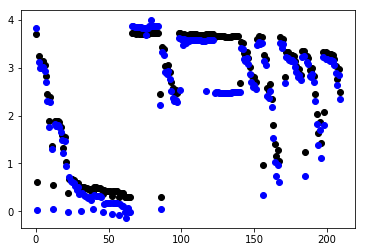

In [39]:
plt.plot(range(0,amount),Kd_full,marker='o',linestyle='',color='black')
plt.plot(range(0,amount),Kd_half,marker='o',linestyle='',color='blue')

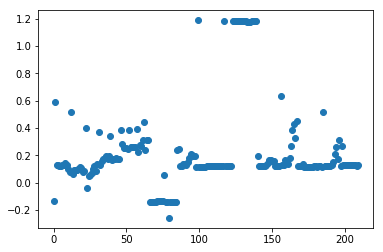

In [40]:
plt.plot(range(0,amount),Kd_full-Kd_half,marker='o',linestyle='')

array([[1.        , 0.96867597],
       [0.96867597, 1.        ]])

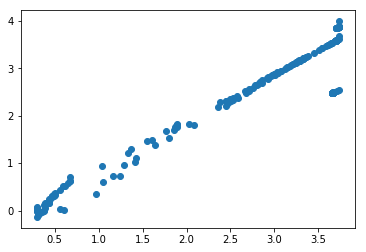

In [41]:
plt.scatter(Kd_full,Kd_half)
np.corrcoef(Kd_full,Kd_half) # correlation between different Kd

--> To plot the hillcurve with these Kd

In [4]:
def Hill_eq(C, Kd):
    return (1.0+Kd/C)**(-1)

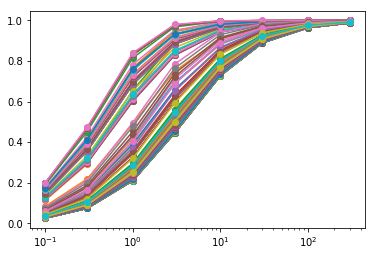

In [8]:
for i in range(0,amount):
    plt.plot(full_conc,Pfull[i],marker='o')
    plt.xscale('log');

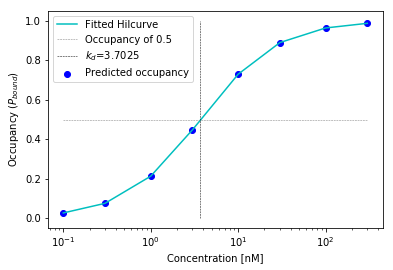

In [7]:
strand=0 # 150 or 0 is almost perfect, 50 is less perfect

#plt.plot(full_conc,Pfull[strand],marker='o', linestyle='',color='steelblue')
#plt.plot(half_conc,Phalf[strand],marker='o', linestyle='', color='orange')
# C=np.linspace(0.1,300,1000)
# Pf=Hill_eq(C,Kd_full[0])
# #Ph=Hill_eq(C,Kd_half[strand])
# plt.plot(C,Pf, color='b')
# #plt.plot(C,Ph, color='red')
# plt.xscale('log');

i=0
concentrations_f =[0.1,0.3, 1, 3, 10, 30, 100, 300] # in nanoMolair
Pbnd=[0.0,
rawABA['0.3nM'].iloc[i],
rawABA['1nM'].iloc[i],
rawABA['3nM'].iloc[i],
rawABA['10nM'].iloc[i],
rawABA['30nM'].iloc[i],
rawABA['100nM'].iloc[i],
rawABA['300nM'].iloc[i]]
#plt.scatter(concentrations_f,Pbnd, color='g',label='Data')
#plt.legend()
#plt.xscale('log')

C=np.linspace(1,30,100)
Pf=Hill_eq(concentrations_f,Kd_full[0])
plt.plot(concentrations_f,Pf,color='c',label='Fitted Hilcurve')
plt.scatter(concentrations_f,Pf,color='b',label='Predicted occupancy')
plt.plot(concentrations_f,np.ones(len(concentrations_f))*0.5,linewidth=0.5,color='gray',linestyle='--',label='Occupancy of 0.5')
plt.plot(Kd_full[0]*np.ones(10),np.linspace(0,1,10),linewidth=0.5,color='black',linestyle='--',label='$k_d$=3.7025')
#plt.title('How to fit the $k_d$?')
plt.ylabel('Occupancy ($P_{bound}$)')
plt.xlabel('Concentration [nM]')
plt.legend()
plt.xscale('log')


In [57]:
Kd_full[0]

3.702509679212895

See notes on paper on how calc-Pbnd works with the Hill equation
This explains mathematically that you can even find the rigth Kd with a point that is so far away from the curve. 

This is because you calculate the Pbnd from the parameters and the concentration. if you have only 1 concentration point you will get also one Pbnd and with this you simply calculate the Kd. 
The steepness for the Hillcurve is always the same, otherwise it is not a hillcurve!
So if you have 1 point on the curve you will always get the right Kd. But this should logically not happen if it is on one of the platforms, but since this is the hillcurve the 0 and 1 are assympotes and therefore it is never really horizontal and you can still get the Kd.

Normally you use multiple concentration points to overcome the noise in the measurements. Therefor we cannot use only 1 point. Also because we do not know yet if equilibrium is reached, we do not know if the measurements will be on the curve at all. because if there is no equilibrium, it is not on the curve.
So because we do not look at the raw data right now, but at the delta ABA which is corrected for the ontarget, we do always get the right Kd.

# Try with raw data

go through file
calculate ABA with less concentration points, see if the correlation is close to 1

In [6]:
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_with_concentrations.csv')
rawABA

,sequence,0.3nM,1nM,3nM,10nM,30nM,100nM,300nM,ABA
0,AAAAGACGCATAAAGATGAGACGCTGG,0.042315,0.098464,0.147735,0.517823,0.719215,0.779476,1.025132,2.472665
1,AAATCACGCATAAAGATGAGACGCTGG,0.033915,0.069671,0.140017,0.505289,0.749726,0.796275,1.040612,2.461025
2,AAATCTCGCATAAAGATGAGACGCTGG,0.034964,0.054619,0.106636,0.466928,0.710597,0.768615,1.013939,2.648707
3,AAATCTGCCATAAAGATGAGACGCTGG,0.028400,0.038526,0.051516,0.398491,0.680187,0.775856,0.990754,2.863859
4,AAATCTGCGATAAAGATGAGACGCTGG,0.027610,0.022130,0.022363,0.312833,0.623188,0.706106,0.943954,3.199845
5,AAATCTGCGTAAAAGATGAGACGCTGG,0.028032,0.029319,0.015852,0.303631,0.629575,0.715343,0.945802,3.193512
6,AAATCTGCGTATAAGATGAGACGCTGG,0.022290,0.023948,0.031354,0.335297,0.641616,0.735807,0.953037,3.093944
7,AAATCTGCGTATTAGATGAGACGCTGG,0.027452,0.021757,0.007976,0.257604,0.573644,0.666098,0.936499,3.424116
8,AAATCTGCGTATTTCATGAGACGCTGG,0.022246,-0.002226,-0.053127,0.080821,0.257565,0.390157,0.689988,4.890889
9,AAATCTGCGTATTTCTACAGACGCTGG,0.022401,-0.003464,-0.054827,0.080664,0.256700,0.368357,0.602167,5.093892


In [8]:
Kd_raw=np.exp(rawABA['ABA'])

In [9]:
rawABA.dropna(inplace=True) #inplace to store the changes in the dataframe
# check if I can use less concnetration points and predict the same ABA as in the last column
# don't include 3
# in the columns with concentration you have the occupancy.

In [10]:
# # Not needed anymore!!!! File is already the Pbnd per concentration instead of the intensity
# full_c=[0,0.1, 0.3, 1, 3, 10, 30, 100, 300]
# def substract_background(df, concentrations):
#     background = df['0nM'].copy()
#     for c in concentrations:
#         df[str(c) + 'nM'] = df[str(c) + 'nM'] - background
#     return df
# #concentrations =[0.1, 0.3, 1, 3, 10, 30, 100, 300]
# #rawABAb=substract_background(rawABA,concentrations)
# #rawABAb

# def norm_to_saturation(df,concentrations):
#     df=substract_background(df,full_c)
#     OnTarget = df[df['On Target'] & df['Canonical'] ].copy()
#     saturation_value = OnTarget[str(concentrations[-1])+'nM'].median()
#     #saturation_value=df['300nM'].copy()
#     for c in concentrations:
#         df[str(c) + 'nM'] = df[str(c) + 'nM'] / saturation_value
#     return df 

# concentrations =[0.1, 0.3, 1, 3, 10, 30, 100, 300] # in nanoMolair
# rawABAnorm=norm_to_saturation(rawABA,concentrations)
# rawABAnorm

In [11]:
# To predict the ABA in the last column with all the concentration points
from scipy.optimize import curve_fit
concentrations_f =[0.1,0.3, 1, 3, 10, 30, 100, 300] # in nanoMolair
def Hill_eq(C, Kd):
    return (1.0+Kd/C)**(-1)
a=len(rawABA['ABA'])
# 0.1 is the background, so concentration is 0 there
ABA_f=[]
Kd_f=[]
for i in range(0,a):
    Pbnd=[0.0,
          rawABA['0.3nM'].iloc[i],
          rawABA['1nM'].iloc[i],
          rawABA['3nM'].iloc[i],
          rawABA['10nM'].iloc[i],
          rawABA['30nM'].iloc[i],
          rawABA['100nM'].iloc[i],
          rawABA['300nM'].iloc[i]]
    Kd, _ = curve_fit(Hill_eq, concentrations_f,Pbnd)
    Kd_f.append(Kd)
    ABA_f.append(np.log(Kd[0]))
ABA_f=np.array(ABA_f)
Kd_f=np.array(Kd_f)

In [12]:
# To predict the ABA with only 4 concentration points
concentrations_h =[0.3, 3, 30, 300] # in nanoMolair
ABA_h=[]
for i in range(0,a):
    Pbnd=[rawABA['0.3nM'].iloc[i],
          rawABA['3nM'].iloc[i],
          rawABA['30nM'].iloc[i],
          rawABA['300nM'].iloc[i]]
    Kd, _ = curve_fit(Hill_eq, concentrations_h,Pbnd)
    ABA_h.append(np.log(Kd[0]))
ABA_h=np.array(ABA_h)

In [13]:
error=ABA_f-ABA_h
av_error=sum(abs(error))/a
av_error

0.08796179552770333

array([[1.        , 0.99742123],
       [0.99742123, 1.        ]])

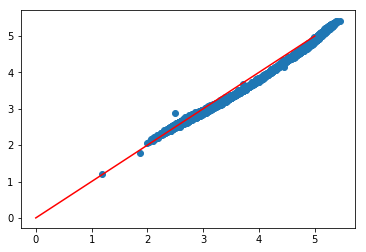

In [14]:
plt.scatter(ABA_f,ABA_h)
plt.plot(range(0,6),range(0,6),color='red')
np.corrcoef(ABA_f,ABA_h) # correlation between different ABA

In [15]:
# To predict the ABA with only 2 concentration points
concentrations_2 =[3, 30] # in nanoMolair
ABA_2=[]
for i in range(0,a):
    Pbnd=[rawABA['3nM'].iloc[i],
          rawABA['30nM'].iloc[i]]
    Kd, _ = curve_fit(Hill_eq, concentrations_2,Pbnd)
    ABA_2.append(np.log(Kd[0]))
ABA_2=np.array(ABA_2)

In [16]:
error2=ABA_f-ABA_2
av_error2=sum(abs(error2))/a
av_error2

0.3259970063925022

array([[1.        , 0.99729783],
       [0.99729783, 1.        ]])

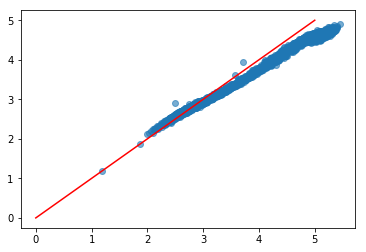

In [17]:
plt.scatter(ABA_f,ABA_2,alpha=0.6)
plt.plot(range(0,6),range(0,6),color='red')
np.corrcoef(ABA_f,ABA_2) # correlation between different ABA

In [18]:
# To predict the ABA with only 1 concentration points
concentrations_1 =[3] # in nanoMolair
ABA_1=[]
for i in range(0,a):
    Pbnd=[rawABA['3nM'].iloc[i]]
    Kd, _ = curve_fit(Hill_eq, concentrations_1,Pbnd)
    ABA_1.append(np.log(Kd[0]))
ABA_1=np.array(ABA_1)

C:\Users\Diewertje\Python\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([[1.        , 0.92333608],
       [0.92333608, 1.        ]])

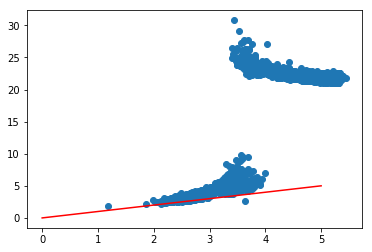

In [19]:
plt.scatter(ABA_f,ABA_1)
plt.plot(range(0,6),range(0,6),color='red')
np.corrcoef(ABA_f,ABA_1) # correlation between different ABA

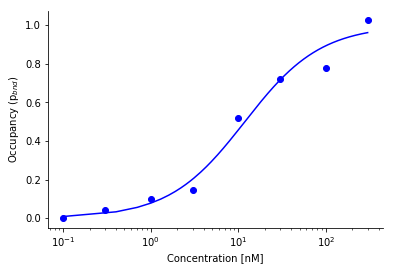

In [28]:
# With half of the concentration points (4)
strand=0 # 150 or 0 is almost perfect, 50 is less perfect

plot_data=rawABA.loc[strand:strand, '0.3nM':'300nM'].to_numpy()
plot_data=plot_data[0]
plot_data_f=np.append(0,plot_data)
plot_data_h=np.array([plot_data[0],plot_data[2],plot_data[4],plot_data[6]])

plt.plot(concentrations_f,plot_data_f,marker='o', linestyle='',color='blue')
#plt.plot(concentrations_h,plot_data_h,marker='o', linestyle='', color='orange')
C=np.linspace(0.1,300,1000)
# Pf=Hill_eq(C,Kd_full[0])
Ph=Hill_eq(C,np.exp(ABA_h[strand]))
Pf=Hill_eq(C,np.exp(ABA_f[strand]))
plt.plot(C,Pf, color='blue')
#plt.plot(C,Ph, color='red')
plt.xscale('log');
plt.xlabel('Concentration [nM]')
plt.ylabel('Occupancy (p$_{bnd}$)')
import seaborn as sns
sns.despine()

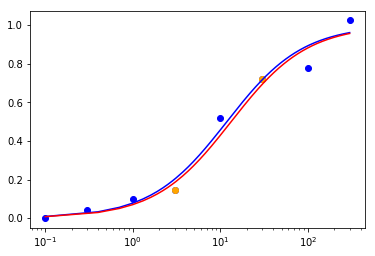

In [16]:
# With 2 concentration points
strand=0 # 150 or 0 is almost perfect, 50 is less perfect

plot_data=rawABA.loc[strand:strand, '0.3nM':'300nM'].to_numpy()
plot_data=plot_data[0]
plot_data_f=np.append(0,plot_data)
plot_data_2=np.array([plot_data[2],plot_data[4]])

plt.plot(concentrations_f,plot_data_f,marker='o', linestyle='',color='blue')
plt.plot(concentrations_2,plot_data_2,marker='o', linestyle='', color='orange')
C=np.linspace(0.1,300,1000)
# Pf=Hill_eq(C,Kd_full[0])
P2=Hill_eq(C,np.exp(ABA_2[strand]))
Pf=Hill_eq(C,np.exp(ABA_f[strand]))
plt.plot(C,Pf, color='blue')
plt.plot(C,P2, color='red')
plt.xscale('log');

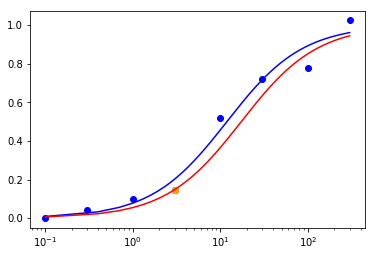

In [17]:
# With only 1 concentration point
strand=0 # 150 or 0 is almost perfect, 50 is less perfect

plot_data=rawABA.loc[strand:strand, '0.3nM':'300nM'].to_numpy()
plot_data=plot_data[0]
plot_data_f=np.append(0,plot_data)
plot_data_1=np.array([plot_data[2]])

plt.plot(concentrations_f,plot_data_f,marker='o', linestyle='',color='blue')
plt.plot(concentrations_1,plot_data_1,marker='o', linestyle='', color='orange')
C=np.linspace(0.1,300,1000)
# Pf=Hill_eq(C,Kd_full[0])
P1=Hill_eq(C,np.exp(ABA_1[strand]))
Pf=Hill_eq(C,np.exp(ABA_f[strand]))
plt.plot(C,Pf, color='blue')
plt.plot(C,P1, color='red')
plt.xscale('log');

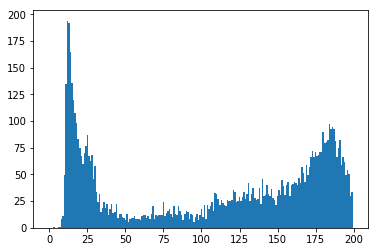

In [18]:
# to check in which range of concentration we need to be:
Kd_f=np.exp(ABA_f)
plt.hist(Kd_f,bins=[i-0.5 for i in range(201)]);
# ontarget at low concentration, off-target at high concentration
# cannot draw a conclustion about concentration range

In [78]:
# try every combination of 2 concemtration points
import math
concentrations_f =[0.1, 0.3, 1, 3, 10, 30, 100, 300]

Conc_swipe2=[]
Nan_swipe2=[]
Error_swipe2=[]
Corr_swipe2=[]

for k in range(0,7):
    for j in range(k+1,8):
        concentrations_s =[concentrations_f[k], concentrations_f[j]]
        Conc_swipe2.append(concentrations_s)
        Kd_s=[]
        for i in range(0,a):
            if(concentrations_s[0]==0.1):
                Pbnd=[0,
                      rawABA[str(concentrations_s[1])+ 'nM'].iloc[i]]
            else:
                Pbnd=[rawABA[str(concentrations_s[0])+ 'nM'].iloc[i],
                      rawABA[str(concentrations_s[1])+ 'nM'].iloc[i]]
            try: # because you do not always get a result from the fit
                Kd, _ = curve_fit(Hill_eq, concentrations_s,Pbnd, bounds=(0,inf))
            except:
                Kd[0]=0 # 'nan'
                print('except for conc:', concentrations_s)
            Kd_s.append(Kd[0])
            #ABA_s.append(np.log(Kd[0]))
        #ABA_s=np.array(ABA_s)
        #Nan_swipe2.append(sum(Kd_s=='nan'))
        #Kd_s[Kd_s != 'nan']
        ABA_s=np.log(Kd_s)
        ABA_s=np.array(ABA_s)
            
        Error_swipe2.append(sum(abs(ABA_f-ABA_s))/a)
        Corr_swipe2.append(np.corrcoef(ABA_f,ABA_s)[1,0])

# if want to go to ABA, you can also set negative Kd at 0

C:\Users\Diewertje\Python\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
C:\Users\Diewertje\Python\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


In [83]:
result2=pd.DataFrame([Conc_swipe2,Error_swipe2,Corr_swipe2]).T
result2.columns=['Conc','Error','Corr']
result2
# select only the ones with error lower than 0.1
result2.loc[result2['Error']<0.2]

,Conc,Error,Corr
17,"[1, 300]",0.121257,0.995874
18,"[3, 10]",0.133267,0.995114
21,"[3, 300]",0.171845,0.994787
23,"[10, 100]",0.100232,0.996159
24,"[10, 300]",0.115358,0.998623


In [27]:
# To check the selected concentrations
import time
t1=time.time()
concentrations_s=[100,300]
count=0
Kd_s=[]
for i in range(0,a):
            if(concentrations_s[0]==0.1):
                Pbnd=[0,
                      rawABA[str(concentrations_s[1])+ 'nM'].iloc[i]]
            else:
                Pbnd=[rawABA[str(concentrations_s[0])+ 'nM'].iloc[i],
                      rawABA[str(concentrations_s[1])+ 'nM'].iloc[i]]
            try: # because you do not always get a result from the fit
                Kd, _ = curve_fit(Hill_eq, concentrations_s,Pbnd, maxfev=10000)
            except:
                Kd[0]=0 # 'nan'
                count=count+1
            Kd_s.append(Kd[0])
t2=time.time()
print('The amount of exceptions raised',count)
print('The amount of negative Kd',sum(np.array(Kd_s)<0))
t=t2-t1
print(t)


The amount of exceptions raised 0
The amount of negative Kd 2
7.92836856842041


So we see that using the concentrations [10,300] or [10,100] would give an okay error and no exceptions

Check the error in ABA with 3 points (all possible combinations

In [ ]:
concentrations_f =[0.1, 0.3, 1, 3, 10, 30, 100, 300]
a=len(rawABA['ABA'])

Conc_swipe3=[]
Nan_swipe3=[]
Error_swipe3=[]
Corr_swipe3=[]
Except_swipe3=[]

for k in range(0,6):
    for j in range(k+1,7):
        for l in range (j+1,8):
            concentrations_s =[concentrations_f[k], concentrations_f[j], concentrations_f[l]]
            Conc_swipe3.append(concentrations_s)
            Kd_s=[]
            counts=0
            count=0
            for i in range(0,a):
                if(concentrations_s[0]==0.1):
                    Pbnd=[0,
                          rawABA[str(concentrations_s[1])+ 'nM'].iloc[i],
                          rawABA[str(concentrations_s[2])+ 'nM'].iloc[i]]
                else:
                    Pbnd=[rawABA[str(concentrations_s[0])+ 'nM'].iloc[i],
                          rawABA[str(concentrations_s[1])+ 'nM'].iloc[i],
                          rawABA[str(concentrations_s[2])+ 'nM'].iloc[i]]
                try: # because you do not always get a result from the fit
                    Kd, _ = curve_fit(Hill_eq, concentrations_s,Pbnd,maxfev=1000)
                except:
                    Kd[0]= 0.0001 # 'error'
                    count=count+1
                if(Kd[0]<0): 
                    Kd[0]=0.0001
                    counts=counts+1
                Kd_s.append(Kd[0])
            #Nan_swipe3.append(sum(np.array(Kd_s)=='error'))
            #Kd_s[Kd_s != 'error']
            ABA_s=np.log(Kd_s)
            ABA_s=np.array(ABA_s)
            
            Except_swipe3.append(count)
            Error_swipe3.append(sum(abs(ABA_f-ABA_s))/a)
            Corr_swipe3.append(np.corrcoef(ABA_f,ABA_s)[1,0])

# if want to go to ABA, you can also set negative Kd at 0

In [65]:
result3test=pd.DataFrame([Conc_swipe3,Error_swipe3,Corr_swipe3,Except_swipe3]).T
result3test.columns=['Conc','Error','Corr','Except']
#result3test

# select only the ones with error lower than 0.1
#result3test.loc[result3test['Error']<0.1]

In [107]:
result3=pd.DataFrame([Conc_swipe3,Error_swipe3,Corr_swipe3,Except_swipe3]).T
result3.columns=['Conc','Error','Corr','Except']
result3

# select only the ones with error lower than 0.1
result3.loc[result3['Error']<0.1]

,Conc,Error,Corr,Except
18,"[0.1, 30, 100]",0.0804897,0.997103,0
31,"[0.3, 10, 100]",0.0995136,0.996333,0
33,"[0.3, 30, 100]",0.0809863,0.99589,0
43,"[1, 30, 100]",0.0772794,0.997817,0
48,"[3, 10, 300]",0.0841209,0.998375,0
49,"[3, 30, 100]",0.0828458,0.998787,0
50,"[3, 30, 300]",0.0874158,0.997405,0
54,"[10, 100, 300]",0.0984888,0.997786,0


In [59]:
# To check the selected concentrations
import time
t1=time.time()
concentrations_s=[0.1,0.3,3]
counts=0
count=0
Kd_s=[]
for i in range(0,a):
        if(concentrations_s[0]==0.1):
            Pbnd=[0,
                  rawABA[str(concentrations_s[1])+ 'nM'].iloc[i],
                  rawABA[str(concentrations_s[2])+ 'nM'].iloc[i]]
        else:
            Pbnd=[rawABA[str(concentrations_s[0])+ 'nM'].iloc[i],
                  rawABA[str(concentrations_s[1])+ 'nM'].iloc[i],
                  rawABA[str(concentrations_s[2])+ 'nM'].iloc[i]]
        try: # because you do not always get a result from the fit
            Kd, _ = curve_fit(Hill_eq, concentrations_s,Pbnd,maxfev=10000)
        except:
            Kd[0]= 0.0001 # 'error'
            count=count+1
        if(Kd[0]<0): 
            Kd[0]=0.0001
            counts=counts+1
        Kd_s.append(Kd[0])

print('The amount of exceptions raised',count)
print('The amount of negative Kd',counts)
ABA_s=np.log(Kd_s)
ABA_s=np.array(ABA_s)
Error=(sum(abs(ABA_f-ABA_s))/a)
print('The Error=',Error)

t2=time.time()
t=t2-t1
print(t)


The amount of exceptions raised 10
The amount of negative Kd 0
The Error= 12.056532401517847
8.359593391418457


In [58]:
sum(ABA_s==float("-inf"))

10

In [55]:
c=np.array([True,False,True])
rara=np.array([1,2,3])
rara[c]

array([1, 3])

# The absolute ABA data for simple fit pipiline

In [3]:
# The absolute ABA for trying the simple fit pipeline
import Prepare_data_Simple as Pre
rawABAfit=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABAfit

,sequence,ABA,error,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,AAAAGACGCATAAAGATGAGACGCTGG,2.451314,0.120136,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
1,AAATCACGCATAAAGATGAGACGCTGG,2.465621,0.050944,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||||||||.\r...,CGCAGAGTAGAAATACGCAG-\r\n||||||||||||||||||| ...,r:20:C,r,1.0,20
2,AAATCTCGCATAAAGATGAGACGCTGG,2.660628,0.060161,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||..\r...,CGCAGAGTAGAAATACGCAG--\r\n|||||||||||||||||| ...,r:19:T|r:20:C,r,2.0,19|20
3,AAATGACGCATAAAGATGAGACGCTGG,2.531423,0.061229,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
4,AATAGACGCATAAAGATGAGACGCTGG,2.626618,0.052173,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
5,ACTAGACGCATAAAGATGAGACGCTGG,2.780461,0.036286,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
6,AGTAGACGCATAAAGATGAGACGCTGG,2.640303,0.041959,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
7,ATAAGACGCATAAAGATGAGACGCTGG,2.612687,0.066341,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
8,ATCAGACGCATAAAGATGAGACGCTGG,2.683235,0.047547,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
9,ATGAGACGCATAAAGATGAGACGCTGG,2.668154,0.040950,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN


In [ ]:
path_to_data='../Data_ABA_Finkelsteinlab/'
filename='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'
xdata,ydata,yerr=Pre.Prepare_Cdata(path_to_data,filename)

In [7]:
rawABA[rawABA['sequence']=='AAATCTCGCATAAAGATGAGACGCTGG']

,sequence,0.3nM,1nM,3nM,10nM,30nM,100nM,300nM,ABA
2,AAATCTCGCATAAAGATGAGACGCTGG,0.034964,0.054619,0.106636,0.466928,0.710597,0.768615,1.013939,2.648707


In [8]:
rawABAfit[rawABAfit['sequence']=='AAATCTCGCATAAAGATGAGACGCTGG']

,sequence,ABA,error,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
2,AAATCTCGCATAAAGATGAGACGCTGG,2.660628,0.060161,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||..\r...,CGCAGAGTAGAAATACGCAG--\r\n|||||||||||||||||| ...,r:19:T|r:20:C,r,2.0,19|20
